In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
from matplotlib import cm #colormap

In [3]:
def analytical_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    u = (numpy.sinh(1.5* numpy.pi * Y/Ly) * numpy.sin(1.5*numpy.pi * X/Lx) / numpy.sinh(1.5* numpy.pi * Ly/Lx))
    
    return u

In [5]:
Lx, Ly = 1.0, 1.0
nx, ny = 41, 41

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

ua = analytical_solution(x, y, Lx, Ly) #ua is u analytical

In [6]:
def plot_3d(x, y, u):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = numpy.meshgrid(x,y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis) #if not, the surface will be black and white
    ax.view_init(elev=30.0, azim=45.0)

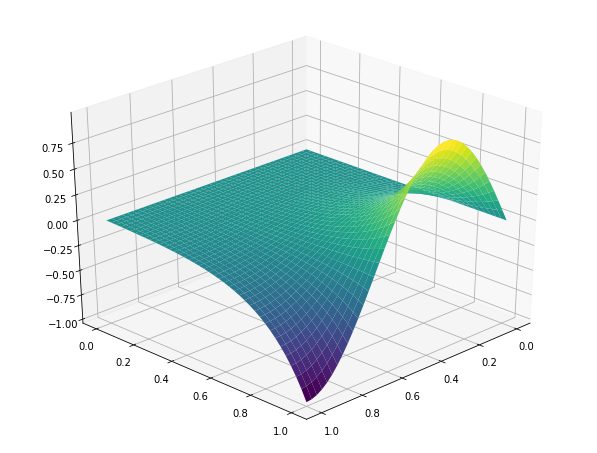

In [7]:
plot_3d(x, y, ua)

In [26]:
#We will use Jacobian method and for that we will iterate
def relative_L2norm(u, u_ref):
    rdiff = ( numpy.sqrt(numpy.sum((u - u_ref)**2)) / numpy.sqrt(numpy.sum(u_ref**2)))
    return rdiff

In [30]:
def laplace2d_jacobi(u0, rtol=1e-6, maxiter=20000) :
    #u0 is our initial guess, max number of iteration tamamlarsan iyi olur yoksa kod looptan cikmiyor
    u = u0.copy()
    ite = 0
    rdiff = rtol +1.0 #so that we are sure to execute what is inside the while loop
    while rdiff > rtol and ite < maxiter:
        un = u.copy() 
        u[1 : -1, 1:-1] = 0.25 * (u[: -2, 1:-1] + u[1: -1, :-2] + u[1:-1, 2:] + u[2:, 1:-1]) 
        #Neumann i update ttik sadece value at the boundary esittir value at the left
        u[1:-1, -1] = u[1:-1, -2]
        rdiff = relative_L2norm(u, un)
        #I need to update both rdiff and ite in the while loop
        ite += 1
    return u, ite, rdiff
        

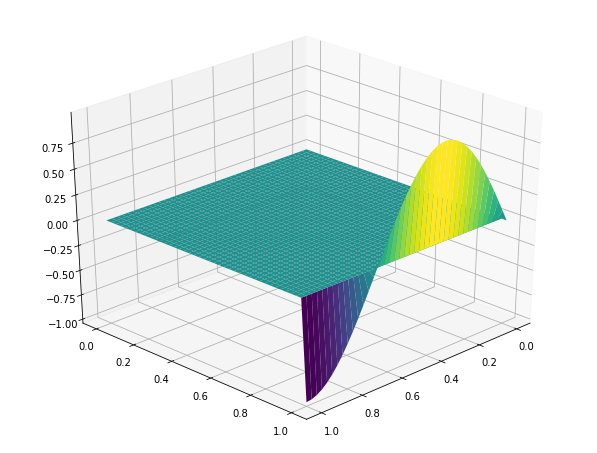

In [31]:
#Initial guess
u0 = numpy.zeros((ny, nx)) #ny rows, nx columns
u0[-1, :] = numpy.sin(1.5*numpy.pi * x / Lx) #all the points in the top boundary
plot_3d(x, y, u0)

In [35]:
u, ites, rdiff = laplace2d_jacobi(u0, rtol=1e-8)

In [36]:
print(ites, rdiff)

402 9.792342336778094e-09


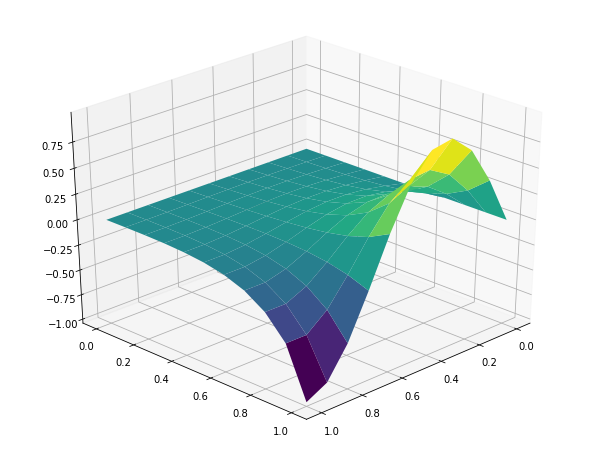

In [37]:
plot_3d(x, y, u)

In [40]:
nx_values = [11, 21, 41, 48]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_L2norm(u, ua)
    errors.append(error)

11
21
41
48


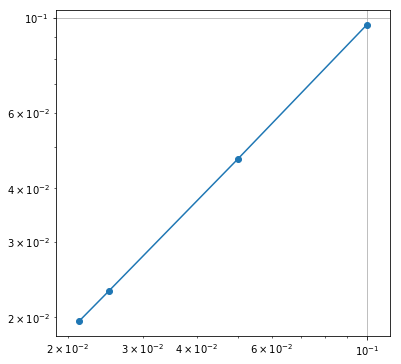

In [41]:
pyplot.figure(figsize=(6,6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx/(nx-1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

In [49]:
def laplace2d_jacobi_neumann(u0, rtol=1e-6, maxiter=20000) :
    #u0 is our initial guess, max number of iteration tamamlarsan iyi olur yoksa kod looptan cikmiyor
    u = u0.copy()
    ite = 0
    rdiff = rtol +1.0 #so that we are sure to execute what is inside the while loop
    while rdiff > rtol and ite < maxiter:
        un = u.copy() 
        u[1 : -1, 1:-1] = 0.25 * (u[: -2, 1:-1] + u[1: -1, :-2] + u[1:-1, 2:] + u[2:, 1:-1]) 
        #Neumann i update ttik sadece value at the boundary esittir value at the left
 #       u[1:-1, -1] = u[1:-1, -2]
        u[1:-1, -1] = 0.25 * (u[:-2, -1] + 2*u[1:-1, -2] + u[2:, -1]   )
        rdiff = relative_L2norm(u, un)
        #I need to update both rdiff and ite in the while loop
        ite += 1
    return u, ite, rdiff

In [50]:
nx_values = [11, 21, 41, 48]
errors = []

for nx in nx_values:
   # print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi_neumann(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_L2norm(u, ua)
    errors.append(error)

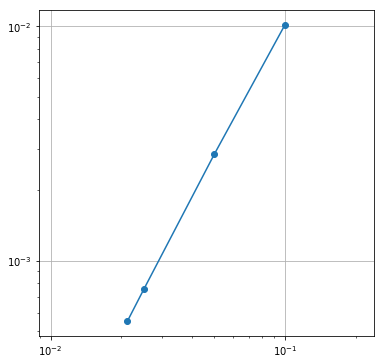

In [52]:
pyplot.figure(figsize=(6,6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx / (nx-1))
pyplot.loglog(dx_values, errors, marker = 'o')
pyplot.axis('equal');